In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MergedData/Final.csv")

# Ensure numeric
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

# Categorize AQI into categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

In [4]:
features = ['Temperature', 'RelativeHumidity']
X = df[features]
y = df['AQI_Category']

In [6]:
#Split dataset for traing 80% and test 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
models = {
     "Logistic Regression": LogisticRegression(max_iter=1000),
     "KNN": KNeighborsClassifier(n_neighbors=5),
     "Random Forest Tree": RandomForestClassifier( n_estimators=100, max_depth=15, random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model


 Logistic Regression Performance:
Accuracy:  0.50
Precision: 0.40
Recall:    0.50
F1-Score:  0.41

Classification Report:
                                precision    recall  f1-score   support

                          Good       0.53      0.89      0.66      4156
                     Hazardous       0.00      0.00      0.00       114
                      Moderate       0.26      0.09      0.14      2481
                     Unhealthy       0.50      0.44      0.47      1788
Unhealthy for Sensitive Groups       0.00      0.00      0.00       845
                Very Unhealthy       0.75      0.10      0.18       151

                      accuracy                           0.50      9535
                     macro avg       0.34      0.25      0.24      9535
                  weighted avg       0.40      0.50      0.41      9535



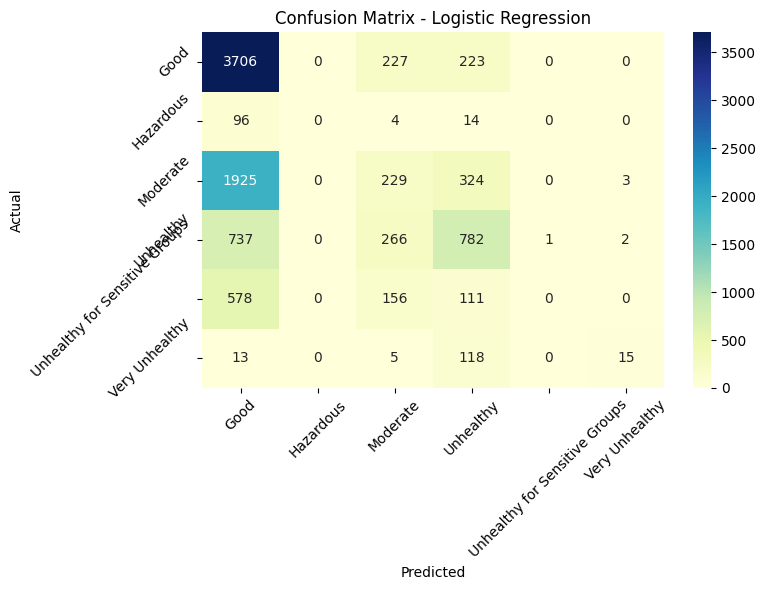


 KNN Performance:
Accuracy:  0.46
Precision: 0.43
Recall:    0.46
F1-Score:  0.43

Classification Report:
                                precision    recall  f1-score   support

                          Good       0.54      0.72      0.61      4156
                     Hazardous       0.02      0.01      0.01       114
                      Moderate       0.30      0.24      0.27      2481
                     Unhealthy       0.49      0.42      0.45      1788
Unhealthy for Sensitive Groups       0.19      0.06      0.09       845
                Very Unhealthy       0.52      0.23      0.32       151

                      accuracy                           0.46      9535
                     macro avg       0.34      0.28      0.29      9535
                  weighted avg       0.43      0.46      0.43      9535



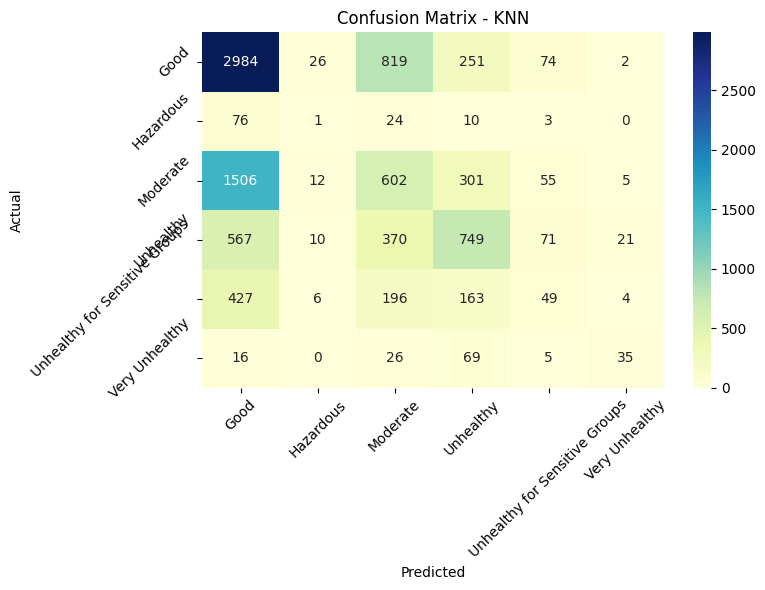


 Random Forest Tree Performance:
Accuracy:  0.51
Precision: 0.46
Recall:    0.51
F1-Score:  0.46

Classification Report:
                                precision    recall  f1-score   support

                          Good       0.56      0.82      0.66      4156
                     Hazardous       0.00      0.00      0.00       114
                      Moderate       0.34      0.18      0.23      2481
                     Unhealthy       0.50      0.52      0.51      1788
Unhealthy for Sensitive Groups       0.26      0.07      0.11       845
                Very Unhealthy       0.59      0.27      0.37       151

                      accuracy                           0.51      9535
                     macro avg       0.37      0.31      0.31      9535
                  weighted avg       0.46      0.51      0.46      9535



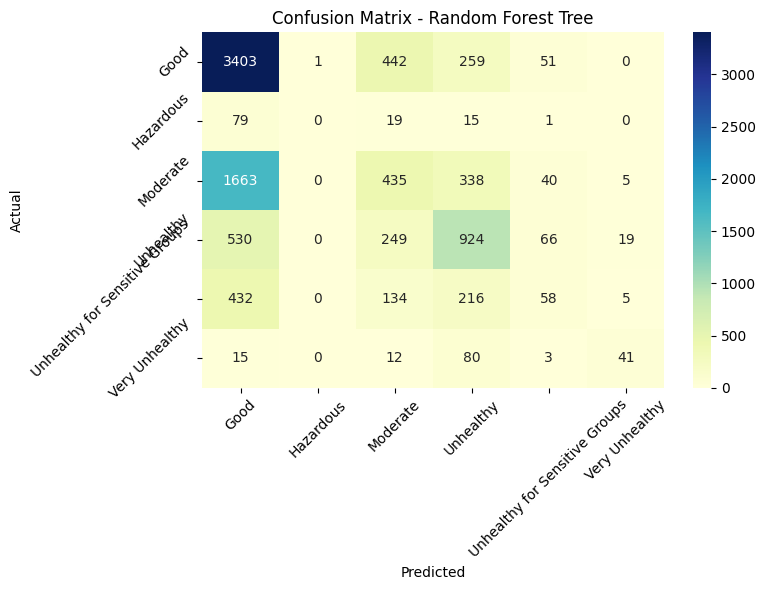

In [33]:
import warnings
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n {name} Performance:")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


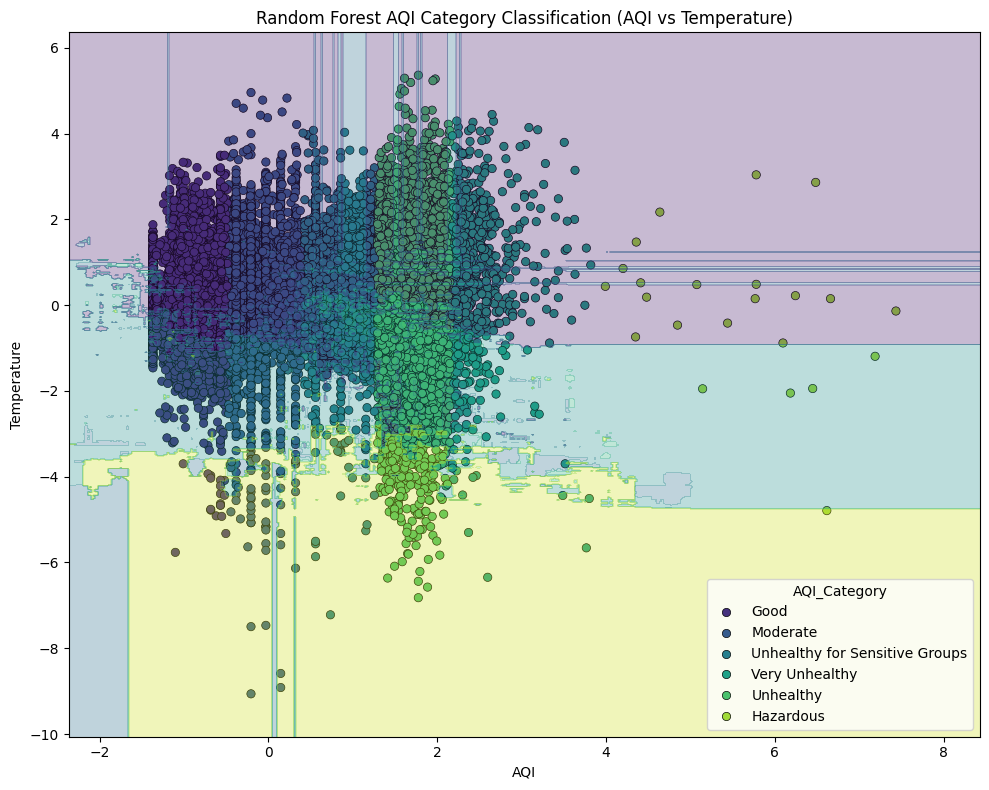

In [25]:
feature1 = 'AQI'
feature2 ='Temperature'

# Fit the best model
best_model = trained_models['Random Forest Tree']
X_vis = df[[feature1, feature2]].dropna()
y_vis = df.loc[X_vis.index, 'AQI_Category']

scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Meshgrid for decision boundary
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z).codes.reshape(xx.shape)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1], hue=y_vis, palette="viridis", edgecolor="k")
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title("Random Forest AQI Category Classification (AQI vs Temperature)")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.tight_layout()
plt.show()
